In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert data
data = [
    ("Laptop", 2, 50000),
    ("Mouse", 10, 500),
    ("Keyboard", 5, 1500),
    ("Laptop", 1, 52000),
    ("Mouse", 5, 550),
    ("Keyboard", 3, 1400)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()

In [3]:
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

df

,product,total_quantity,total_revenue
0,Keyboard,8,11700.0
1,Laptop,3,152000.0
2,Mouse,15,7750.0


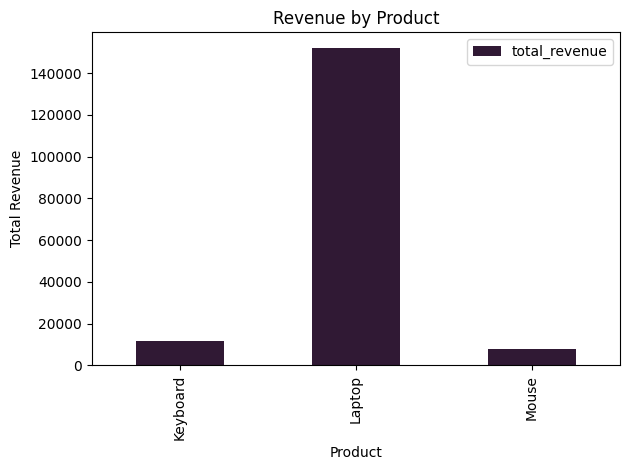

In [8]:
df.plot(kind='bar', x='product', y='total_revenue',color="#301934")

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()